In [2]:
import yfinance as yf
import datetime 
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# start = datetime.datetime.now() - datetime.timedelta(7)
# end  = datetime.datetime.now()
# df = yf.download('SPY, AMZN', start=start, end=end, interval='1m')

[*********************100%%**********************]  2 of 2 completed


# Hello World

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

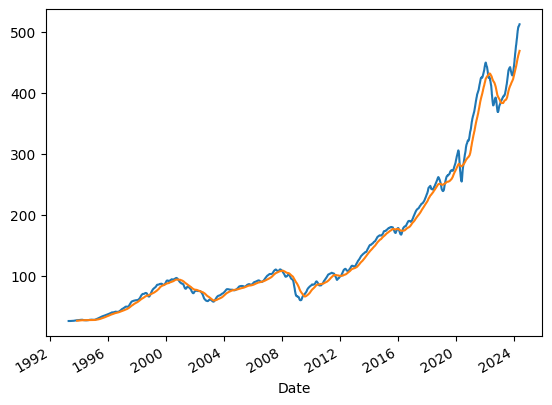

In [70]:
# downlaod the data
df = yf.download('SPY')
spy = df['Adj Close']
# spy.plot()

ma1 = spy.rolling(50).mean()
ma2 = spy.rolling(200).mean()
ma1.plot()
ma2.plot()

In [86]:
entry = None
pnls = []
dates = []
unrlzd = []
unrlzd_dates = []
inpos = 0
hold_time = []
COMMS = 0.005


for i in range(len(spy)):
    unr = ((spy.iloc[i] - spy.iloc[i-1])/ spy.iloc[i-1]) * inpos
    unrlzd.append(unr)
    unrlzd_dates.append(spy.index[i])
    
    if (ma1.iloc[i] - ma2.iloc[i]) > 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) < 0:
        if entry:
            pnl = (entry - spy.iloc[i])/entry - COMMS # commission subtracted
            pnls.append(pnl)
            dates.append(spy.index[i])
            hold_time.append((spy.index[i] - start).total_seconds())

        entry = spy.iloc[i]
        start = spy.index[i]
        inpos = 1

    elif (ma1.iloc[i] - ma2.iloc[i]) < 0 and (ma1.iloc[i-1] - ma2.iloc[i-1] > 0):
        if entry:
            pnl = (spy.iloc[i] - entry)/entry - COMMS # commission subtracted
            pnls.append(pnl)
            dates.append(spy.index[i])
            hold_time.append((spy.index[i] - start).total_seconds())

        entry = spy.iloc[i]
        start = spy.index[i]
        inpos = -1

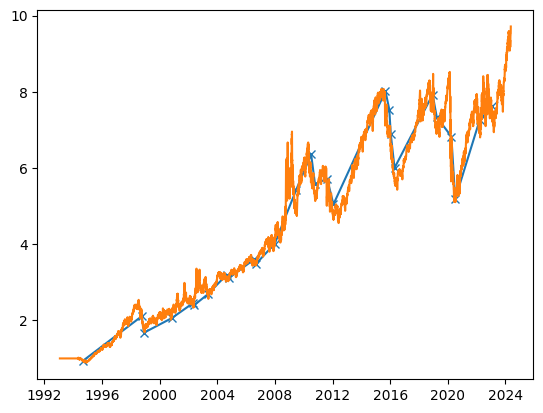

In [87]:
plt.plot(dates, np.cumprod(1 + np.array(pnls)), '-x')
plt.plot(unrlzd_dates, np.cumprod(1 + np.array(unrlzd)))

In [88]:
# metrics to evaluate strategies
rar = np.mean(unrlzd)/np.std(unrlzd) * 16 # 252 for yearly 
rar

0.488128643985134

In [89]:
np.mean(np.array(pnls) - 0.002)# need to subtact commission from each trade to

0.10721421211738008

In [90]:
# AVERAGE DAYS TRANSACTION WAS HELD
hold_days = np.array(hold_time)/86400
hold_days.mean()

388.85185185185185

In [91]:
# incorporating costs

In [95]:
def get_pay(hours, ot_hours, tax=None):
    rate = 2900
    base_pay = hours * rate
    ot_pay = ot_hours * rate * 1.25

    pay = base_pay + ot_pay

    if tax:
        pay = 0.8 * pay
    pay += 5500
    return pay



In [96]:
hours = 160
ot_hours = 25.5

salary = get_pay(hours, ot_hours)
taxed_salary = get_pay(hours, ot_hours, True)

salary, taxed_salary

(561937.5, 450650.0)

In [99]:
get_pay(160-16, 29, True)

423680.0